In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# importiamo i csv con tutti i dati
driveStand = pd.read_csv('../dataSets/f1-od/driver_standings.csv')
raceDet = pd.read_csv('../dataSets/f1-od/race_details.csv')
quali = pd.read_csv('../dataSets/f1-od/qualifyings.csv')

Top 10 piloti con più gare disputate

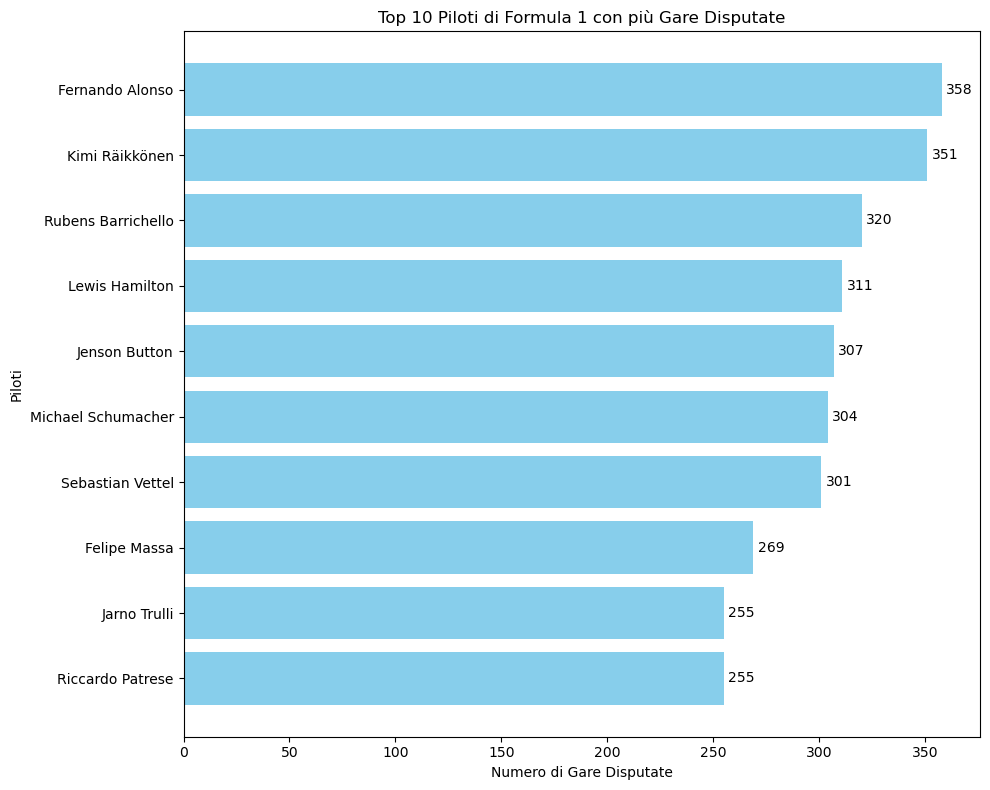

In [3]:
# Conta il numero di gare disputate per ogni pilota
gare_per_pilota = raceDet['Driver'].value_counts()

# Seleziona i 10 piloti con più gare disputate
top_piloti = gare_per_pilota.nlargest(10)

# Configura il grafico
plt.figure(figsize=(10, 8))

# Crea il diagramma a barre orizzontali
plt.barh(top_piloti.index, top_piloti.values, color='skyblue')

# Aggiungi i valori al termine di ogni barra
for i in range(len(top_piloti)):
    plt.text(top_piloti.values[i] + 2, i, str(top_piloti.values[i]), va='center')

# Aggiungi etichette e titolo
plt.xlabel('Numero di Gare Disputate')
plt.ylabel('Piloti')
plt.title('Top 10 Piloti di Formula 1 con più Gare Disputate')
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere il pilota con più gare in cima

# Mostra il grafico
plt.tight_layout()
plt.show()

Top 10 piloti con più mondiali vinti

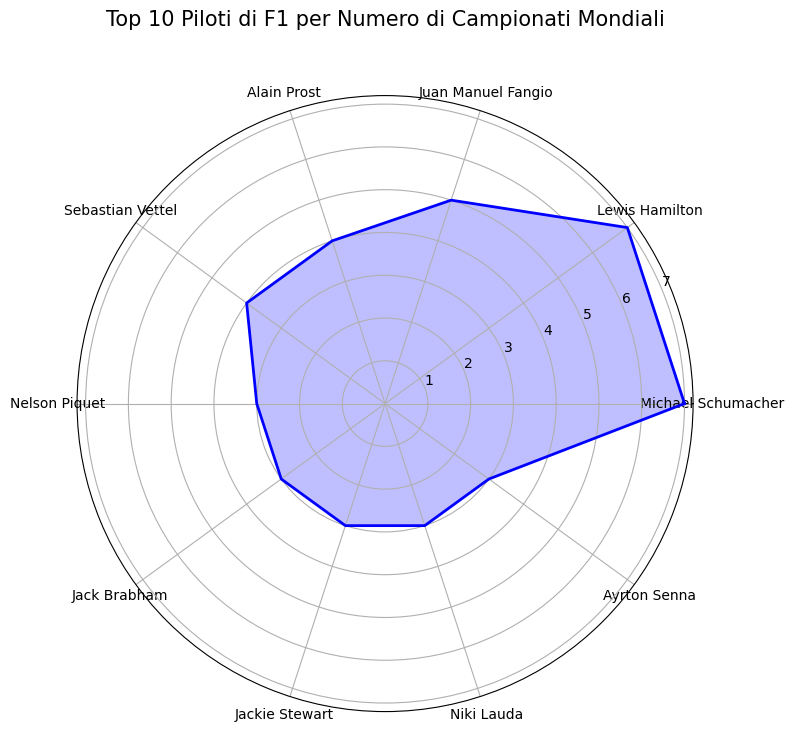

In [4]:
# Trova il pilota con il maggior numero di punti per ogni anno
champions = driveStand.loc[driveStand.groupby('Year')['PTS'].idxmax()]

# Conta il numero di campionati vinti da ciascun pilota
champion_counts = champions['Driver'].value_counts()

# Prendi i top 10 piloti
top_10_champions = champion_counts.nlargest(10)

# Dati per il grafico polare
pilots = top_10_champions.index
wins = top_10_champions.values

# Angoli per il grafico polare
angles = np.linspace(0, 2 * np.pi, len(pilots), endpoint=False).tolist()

# Completa il cerchio
wins = np.concatenate((wins, [wins[0]]))
angles += angles[:1]

# Creazione del grafico polare
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, wins, color='blue', alpha=0.25)
ax.plot(angles, wins, color='blue', linewidth=2)

# Etichette dei piloti
ax.set_xticks(angles[:-1])  # Angoli per le etichette, senza l'ultimo valore duplicato
ax.set_xticklabels(pilots)  # Etichette corrispondenti

# Titolo
plt.title('Top 10 Piloti di F1 per Numero di Campionati Mondiali', size=15, color='black', y=1.1)

plt.show()

Percentuale delle nazionalità dei piloti che hanno corso in Formula 1

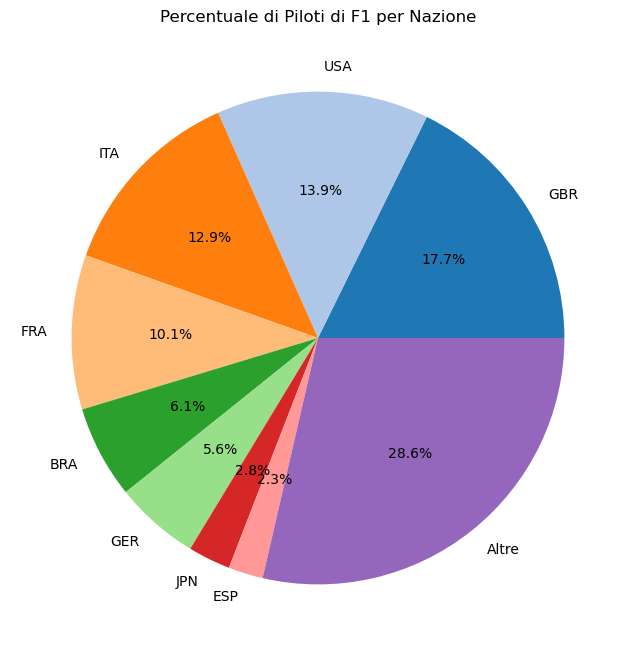

In [5]:
# Rimuovi i duplicati per avere solo un record per ogni pilota
unique_pilots = driveStand[['Driver', 'Nationality']].drop_duplicates()

# Conta il numero di piloti per ciascuna nazione
nationality_counts = unique_pilots['Nationality'].value_counts()

# Calcola la percentuale dei piloti per ciascuna nazione
nationality_percentages = nationality_counts / nationality_counts.sum() * 100

# Seleziona le 6 nazioni con la percentuale più alta
top_6 = nationality_percentages.nlargest(8)

# Calcola la percentuale per tutte le altre nazioni
others_percentage = nationality_percentages.iloc[8:].sum()

# Aggiungi la sezione "Altre" al grafico
top_6['Altre'] = others_percentage

# Creazione del grafico a torta
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_6, labels=top_6.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)

# Titolo del grafico
plt.title('Percentuale di Piloti di F1 per Nazione')

plt.show()import pandas as pd
import matplotlib.pyplot as plt

# 1. Caricamento dei dati
file1 = 'path_to_file1.csv'
file2 = 'path_to_file2.csv'

raceDet = pd.read_csv(file1)
quali = pd.read_csv(file2)

Istogramma con top 10 piloti più vincenti insieme alle gare che hanno disputato

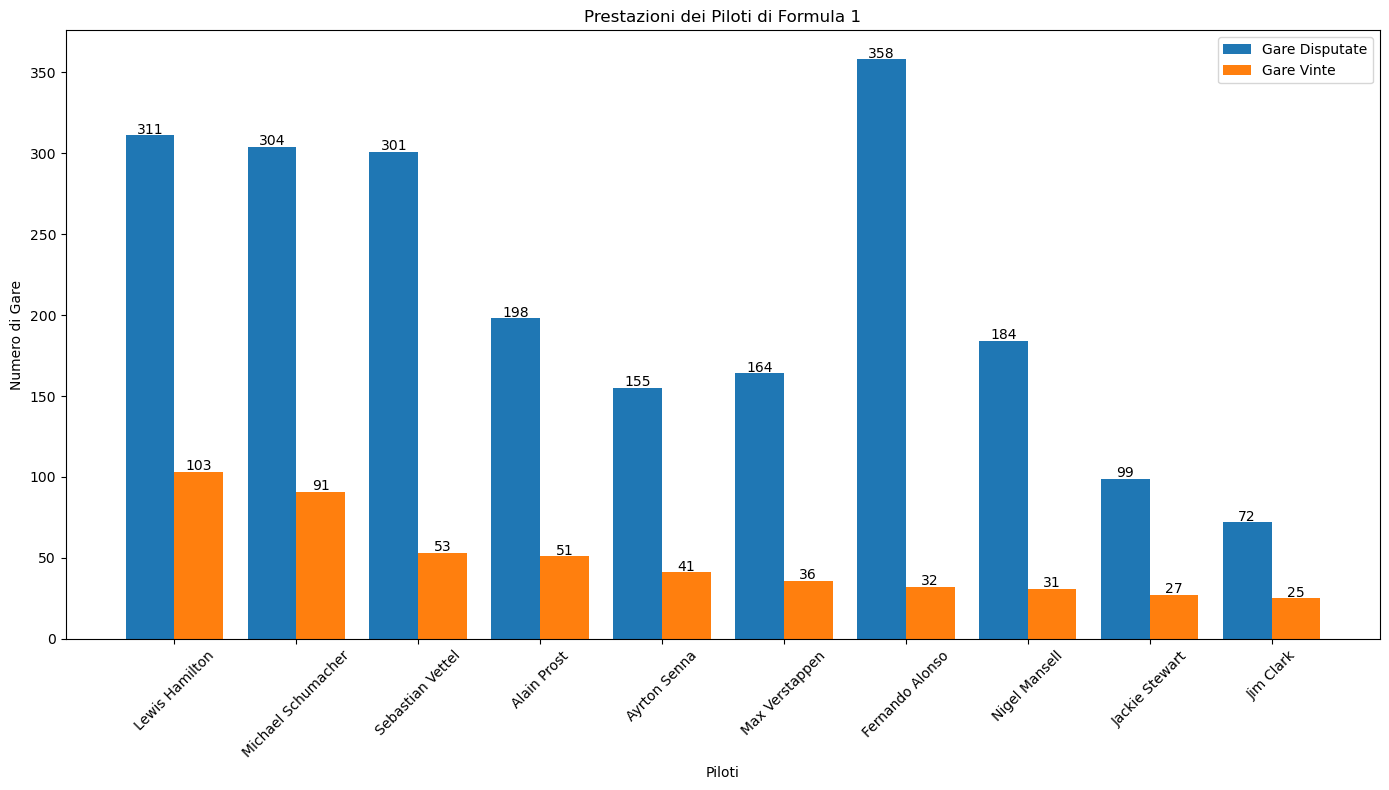

In [6]:
# Assicurati che la colonna 'Pos' sia di tipo numerico
raceDet['Pos'] = pd.to_numeric(raceDet['Pos'], errors='coerce')

# Filtra solo le gare vinte (Pos == 1)
df_vittorie = raceDet[raceDet['Pos'] == 1]

# Conta il numero di vittorie per ogni pilota
vittorie_per_pilota = df_vittorie['Driver'].value_counts()

# Conta il numero di gare disputate per ogni pilota
gare_per_pilota = raceDet['Driver'].value_counts()

# Crea un DataFrame unito con i dati di gare disputate e vinte
prestazioni_piloti = pd.DataFrame({
    'Gare Disputate': gare_per_pilota,
    'Gare Vinte': vittorie_per_pilota
}).fillna(0)

# Seleziona i 10 piloti con più vittorie
top_piloti = prestazioni_piloti.nlargest(10, 'Gare Vinte')

# Configura il grafico
plt.figure(figsize=(14, 8))

# Ottieni le posizioni per i piloti
x = np.arange(len(top_piloti))

# Larghezza delle barre
width = 0.4

# Crea le barre per gare disputate e gare vinte
plt.bar(x - width/2, top_piloti['Gare Disputate'], width, label='Gare Disputate')
plt.bar(x + width/2, top_piloti['Gare Vinte'], width, label='Gare Vinte')

# Aggiungi i valori in cima alle barre
for i in range(len(top_piloti)):
    plt.text(x[i] - width/2, top_piloti['Gare Disputate'].iloc[i] + 1, int(top_piloti['Gare Disputate'].iloc[i]), ha='center')
    plt.text(x[i] + width/2, top_piloti['Gare Vinte'].iloc[i] + 1, int(top_piloti['Gare Vinte'].iloc[i]), ha='center')

# Aggiungi etichette e titolo
plt.xlabel('Piloti')
plt.ylabel('Numero di Gare')
plt.title('Prestazioni dei Piloti di Formula 1')
plt.xticks(x, top_piloti.index, rotation=45)
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

barre impilate con podi, pole position e vittorie per i 10 piloti più vincenti

<Figure size 2000x700 with 0 Axes>

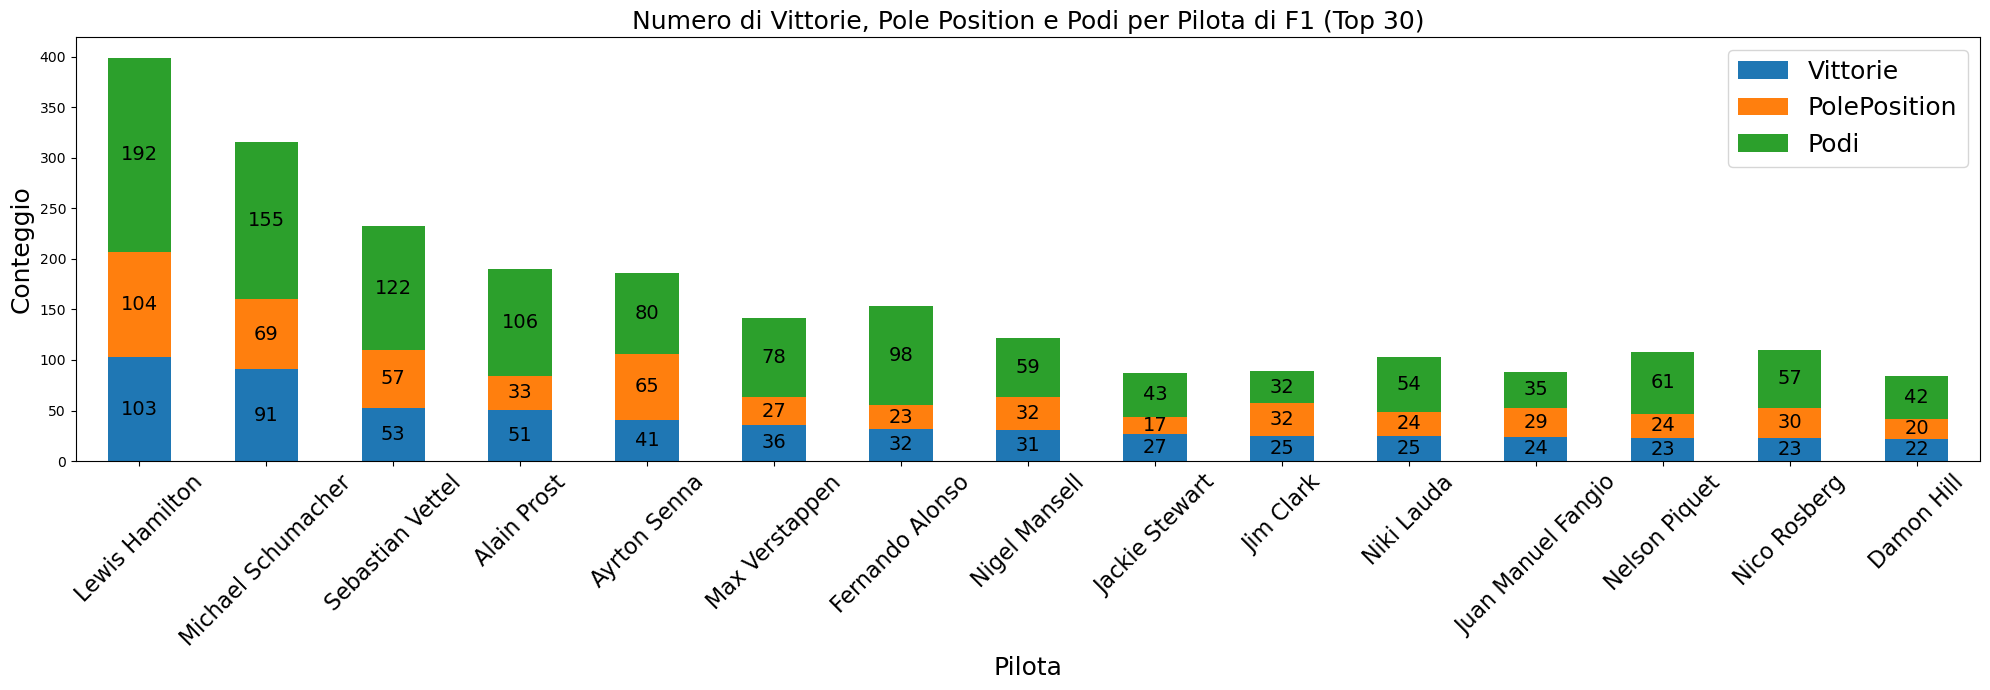

In [7]:
# Converti la colonna 'Pos' in numerico per raceDet, sostituendo le stringhe con 100
raceDet['Pos'] = pd.to_numeric(raceDet['Pos'], errors='coerce').fillna(100).astype(int)

# Calcola il numero di vittorie e podi da raceDet
raceDet['Vittorie'] = raceDet['Pos'].apply(lambda x: 1 if x == 1 else 0)
raceDet['Podi'] = raceDet['Pos'].apply(lambda x: 1 if x <= 3 else 0)

# Raggruppa per pilota e calcola il numero di vittorie e podi usando il nome completo
stats_vittorie_podi = raceDet.groupby('Driver').agg({'Vittorie': 'sum', 'Podi': 'sum'}).reset_index()

# Converti la colonna 'Pos' in numerico per quali, sostituendo le stringhe con 100
quali['Pos'] = pd.to_numeric(quali['Pos'], errors='coerce').fillna(100).astype(int)

# Calcola il numero di pole position da quali
quali['PolePosition'] = quali['Pos'].apply(lambda x: 1 if x == 1 else 0)

# Raggruppa per pilota e calcola il numero di pole position usando il nome completo
stats_pole = quali.groupby('Driver').agg({'PolePosition': 'sum'}).reset_index()

# Unisci i due DataFrame sui nomi dei piloti
stats = pd.merge(stats_vittorie_podi, stats_pole, on='Driver', how='left')

# Sostituisci i valori NaN con 0 (in caso di piloti senza pole position)
stats.fillna(0, inplace=True)

# Ordina i piloti per numero di vittorie in ordine decrescente
stats = stats.sort_values(by='Vittorie', ascending=False)

# Seleziona i primi 15 piloti
stats = stats.head(15)

# Imposta l'indice su Driver per un accesso piÃ¹ semplice durante la visualizzazione
stats.set_index('Driver', inplace=True)

# Aumenta la dimensione della figura per evitare la sovrapposizione dei nomi
plt.figure(figsize=(20, 7))

# Crea il diagramma a barre impilate
bars = stats[['Vittorie', 'PolePosition', 'Podi']].plot(kind='bar', stacked=True, figsize=(20, 7))

# Aggiungi etichette con i numeri esatti su ogni barra
for idx, rect in enumerate(bars.patches):
    height = rect.get_height()
    if height > 0:  # Aggiungi solo etichette per le barre con altezza maggiore di 0
        plt.text(
            rect.get_x() + rect.get_width() / 2,  # Posizione x al centro della barra
            rect.get_y() + height / 2,            # Posizione y al centro della barra
            int(height),                          # Il valore da mostrare
            ha='center', va='center', fontsize=14  # Centra il testo e imposta la dimensione del carattere
        )

# Personalizza il grafico
plt.title('Numero di Vittorie, Pole Position e Podi per Pilota di F1 (Top 30)',fontsize=18)
plt.xlabel('Pilota',fontsize=18)
plt.ylabel('Conteggio',fontsize=18)
plt.legend(fontsize=18)
plt.xticks(rotation=45,fontsize=16)
plt.tight_layout()

# Mostra il grafico
plt.show()